In [23]:
import os
import sys

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pyEDM

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

import warnings
warnings.filterwarnings('ignore')

In [28]:
pyEDM.__version__

'1.13.1.0'

In [2]:
# Get the current working directory and create a path for a new directory named "01_Data".
data_Dir = os.getcwd() + '/01_Data'

# Create a directory for data, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(data_Dir, exist_ok=True)

# Get the current working directory and create a path for a new directory named "02_Analysis".
analysis_Dir = os.getcwd() + '/02_Analysis'

# Create a directory for analysis, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(analysis_Dir, exist_ok=True)

In [3]:
# this path determines where downloaded data will be stored
manifest_path = os.path.join(data_Dir+'/', 'manifest.json')

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path, timeout=50*60)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


In [4]:
# load session information
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
display(brain_observatory_type_sessions)

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [5]:
# download dataset of a specific session
session_id = 791319847
session_dir = data_Dir+'/session_'+str(session_id)
session = cache.get_session_data(session_id) 
sessions.loc[session_id]

published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           769360779
session_type                                              brain_observatory_1.1
age_in_days                                                               116.0
sex                                                                           M
full_genotype                     Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
unit_count                                                                  555
channel_count                                                              2229
probe_count                                                                   6
ecephys_structure_acronyms    [APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,...
Name: 791319847, dtype: object

In [6]:
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

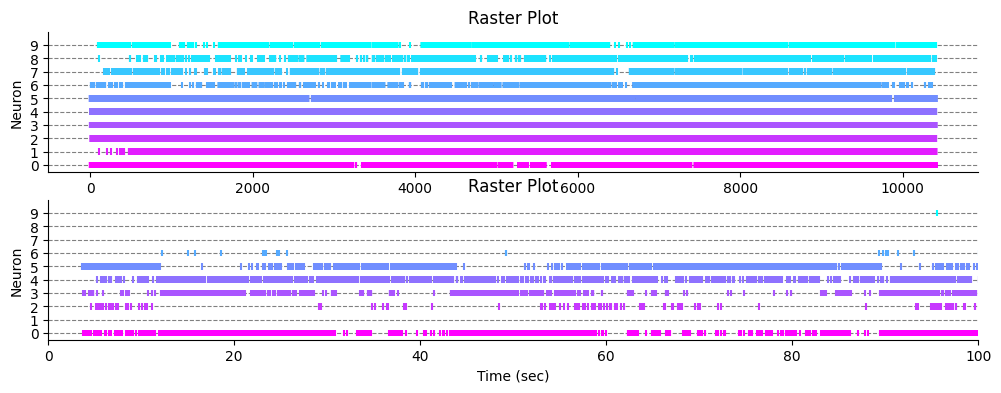

In [7]:
# Extract VISp neurons spike timing and plot as a raster plot
region = 'VISp'
units = session.units[session.units["ecephys_structure_acronym"] == region]
# display(units)

# Extract spike timing
spike_times = []
for unit_id in units.index:
    spike_times.append(session.spike_times[unit_id])

# plot
num_plot_neurons = 10
color_idx = np.linspace(1, 0, num_plot_neurons)

# Create a raster plot
plt.figure(figsize=(12, 4))
plt.subplot(211)
plt.eventplot(spike_times[0:num_plot_neurons], linelengths=0.5, color=plt.cm.cool(color_idx))

# Set axis labels and spines
plt.xlabel('Time (sec)')
plt.ylabel('Neuron')
plt.title('Raster Plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

# Set y-axis tick positions according to the number of neurons
plt.yticks(np.arange(0, num_plot_neurons))
plt.ylim(-0.5, num_plot_neurons)

# Display grid lines
plt.grid(True, axis='y', linestyle='--', color='gray')

plt.subplot(212)
plt.eventplot(spike_times[0:num_plot_neurons], linelengths=0.5, color=plt.cm.cool(color_idx))

# Set x-axis limitation
plt.xlim(0, 100)

# Set axis labels and spines
plt.xlabel('Time (sec)')
plt.ylabel('Neuron')
plt.title('Raster Plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

# Set y-axis tick positions according to the number of neurons
plt.yticks(np.arange(0, num_plot_neurons))
plt.ylim(-0.5, num_plot_neurons)

# Display grid lines
plt.grid(True, axis='y', linestyle='--', color='gray')

In [8]:
def sptimes2binraster(session, region, time_window, binwidth, session_dir):
    '''
        This function returns binned spike train
        Parameters
        ----------
        session: session metainfo
        region: region of intereset i.e. VISp, CA1
        time_window: time window for binning (s)
        binwidth: binwidth (s)
        session_dir: session directory
    ''' 
    import pickle
    out_dir = session_dir+'/binraster'
    os.makedirs(out_dir, exist_ok=True)
    f_name = out_dir+'/binraster_'+ region+'_'+str(binwidth)+'_'+str(time_window[0])+'-'+str(time_window[1])+'.pkl'
    time = np.arange(time_window[0], time_window[1], binwidth)
    if os.path.exists(f_name)==False:
        units = session.units[session.units["ecephys_structure_acronym"] == region]
        binRaster = []
        for unit_id in units.index:
            binRaster_tmp = np.zeros(int(time_window[1]/binwidth-time_window[0]/binwidth))
            for bin_id in range(len(binRaster_tmp)):
                bin_window=time_window[0]+bin_id*binwidth #slide bin window
                binRaster_tmp[bin_id]=len(np.where((bin_window<=session.spike_times[unit_id]) & (bin_window+binwidth>session.spike_times[unit_id]))[0]) #binning
            binRaster.append(binRaster_tmp)
        binRaster=np.array(binRaster)
        with open(f_name, 'wb') as f:
            pickle.dump(binRaster,f)
    else:
        with open(f_name, 'rb') as f:
            binRaster =  pickle.load(f)
    
    return time, binRaster

In [9]:
%%time
# Binning the spike trains
time_window = [0,10409]
binwidth=0.025
time, binraster_VISp = sptimes2binraster(session=session, region='VISp', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_VISrl = sptimes2binraster(session=session, region='VISrl', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_VISl = sptimes2binraster(session=session, region='VISl', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_VISam = sptimes2binraster(session=session, region='VISam', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_VISal = sptimes2binraster(session=session, region='VISal', time_window=time_window, binwidth=binwidth, session_dir=session_dir)

# binraster_CA1 = sptimes2binraster(session=session, region='CA1', time_window=time_window, binwidth=binwidth, session_dir=session_dir)
# binraster_CA3 = sptimes2binraster(session=session, region='CA3', time_window=time_window, binwidth=binwidth, session_dir=session_dir)

CPU times: user 2.27 ms, sys: 125 ms, total: 127 ms
Wall time: 226 ms


Text(0, 0.5, 'Neurons')

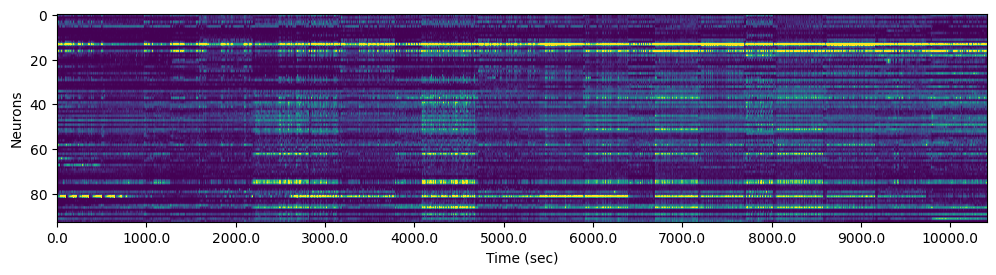

In [10]:
plt.figure(figsize=(12,4))
plt.imshow(binraster_VISp, aspect=1000, vmin=0, vmax=1, cmap='viridis')
plt.xticks(np.arange(0,binraster_VISp.shape[1], 1000/binwidth), np.arange(0,binraster_VISp.shape[1]*binwidth, 1000));
plt.xlabel('Time (sec)')
plt.ylabel('Neurons')


# EDM

https://khigashi1987.github.io/pyEDM_Maizuru/

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
scaled_binraster_VISp = scaler.fit_transform(binraster_VISp)

In [12]:
z_binraster_VISp = stats.zscore(binraster_VISp[:,0:1000], axis=1)
print(np.mean(z_binraster_VISp,axis=1))
print(np.std(z_binraster_VISp,axis=1))

[ 5.68434189e-17             nan  5.68434189e-17  8.52651283e-17
  7.10542736e-17  0.00000000e+00 -1.42108547e-17             nan
             nan             nan -2.84217094e-17 -3.37507799e-17
 -1.13686838e-16 -5.68434189e-17 -7.10542736e-18             nan
  1.13686838e-16 -8.52651283e-17  2.84217094e-17 -2.84217094e-17
 -3.01980663e-17  7.10542736e-18  1.77635684e-17 -1.42108547e-16
  1.42108547e-17  1.77635684e-17  3.55271368e-18  3.55271368e-17
 -5.68434189e-17  8.52651283e-17  8.88178420e-18  3.01980663e-17
  3.55271368e-18 -4.97379915e-17 -2.84217094e-17  2.84217094e-17
  2.84217094e-17  5.68434189e-17  3.90798505e-17  9.94759830e-17
  4.79616347e-17  4.26325641e-17 -2.84217094e-17 -8.52651283e-17
  7.10542736e-18 -5.68434189e-17  1.42108547e-17  4.26325641e-17
  3.55271368e-18  4.26325641e-17  2.84217094e-17  8.52651283e-17
 -4.61852778e-17 -8.52651283e-17  3.55271368e-17  1.42108547e-17
 -7.10542736e-17 -3.37507799e-17  2.84217094e-17             nan
 -4.26325641e-17 -4.97379

In [13]:
z_binraster_VISp_df = pd.DataFrame(np.hstack((np.arange(z_binraster_VISp.shape[1]).reshape(-1,1),z_binraster_VISp[[0,2]].T)), columns=('Time', 'unit00', 'unit01'))
z_binraster_VISp_df

,Time,unit00,unit01
0,0.0,-0.540542,-0.156813
1,1.0,-0.540542,-0.156813
2,2.0,-0.540542,-0.156813
3,3.0,-0.540542,-0.156813
4,4.0,-0.540542,-0.156813
...,...,...,...
995,995.0,-0.540542,-0.156813
996,996.0,-0.540542,-0.156813
997,997.0,1.639064,-0.156813
998,998.0,-0.540542,-0.156813


In [14]:
embed = pyEDM.Embed(dataFrame=z_binraster_VISp_df, E=2, columns=['unit00, unit01'])
embed

,unit00(t-0),unit00(t-1),unit01(t-0),unit01(t-1)
0,-0.540542,NaN,-0.156813,NaN
1,-0.540542,-0.540542,-0.156813,-0.156813
2,-0.540542,-0.540542,-0.156813,-0.156813
3,-0.540542,-0.540542,-0.156813,-0.156813
4,-0.540542,-0.540542,-0.156813,-0.156813
...,...,...,...,...
995,-0.540542,-0.540542,-0.156813,-0.156813
996,-0.540542,-0.540542,-0.156813,-0.156813
997,1.639064,-0.540542,-0.156813,-0.156813
998,-0.540542,1.639064,-0.156813,-0.156813


In [32]:
ac = sm.tsa.acf(z_binraster_VISp_df['unit01'])

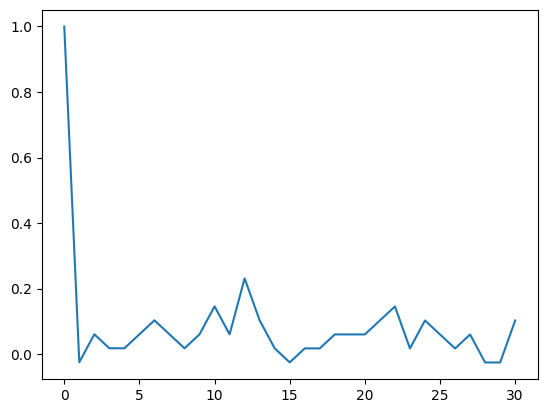

In [33]:
plt.plot(ac)

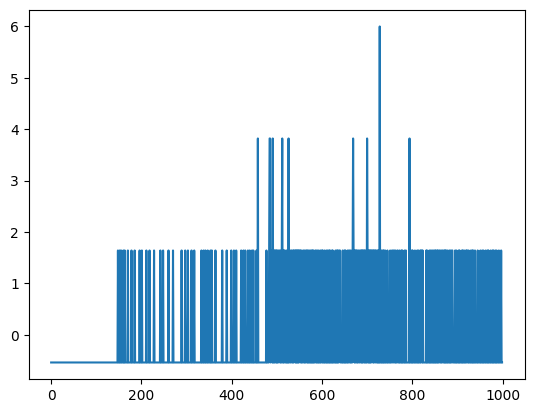

In [49]:
plt.plot(z_binraster_VISp_df['unit00'])

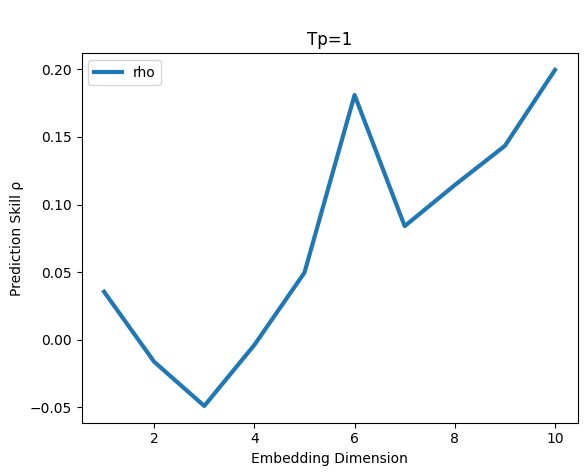

,E,rho
0,1.0,0.035507
1,2.0,-0.016264
2,3.0,-0.048894
3,4.0,-0.003821
4,5.0,0.049652
5,6.0,0.180956
6,7.0,0.084031
7,8.0,0.114383
8,9.0,0.143345
9,10.0,0.199497


In [50]:
pyEDM.EmbedDimension(dataFrame = z_binraster_VISp_df, lib="1 500",pred='501 999', columns='unit00')

In [62]:
z_binraster_VISp_df

,Time,unit00,unit01
0,0.0,-0.540542,-0.156813
1,1.0,-0.540542,-0.156813
2,2.0,-0.540542,-0.156813
3,3.0,-0.540542,-0.156813
4,4.0,-0.540542,-0.156813
...,...,...,...
995,995.0,-0.540542,-0.156813
996,996.0,-0.540542,-0.156813
997,997.0,1.639064,-0.156813
998,998.0,-0.540542,-0.156813


In [64]:
time_delay = pyEDM.MakeBlock(dataFrame = z_binraster_VISp_df, E=6, tau=-1, columnNames=['unit00', 'unit01'], deletePartial=False)

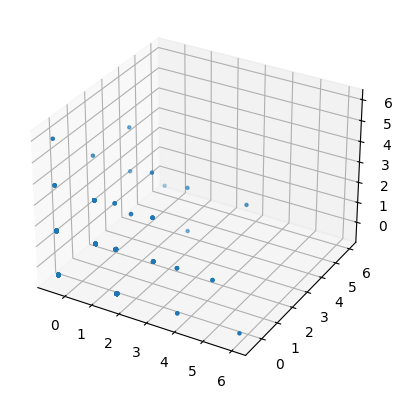

In [68]:
time_delay
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(time_delay['unit00(t-0)'], time_delay['unit00(t-1)'], time_delay['unit00(t-2)'], s=5)

Pearson: 0.18
Spearman: 0.20
Kendall: 0.20


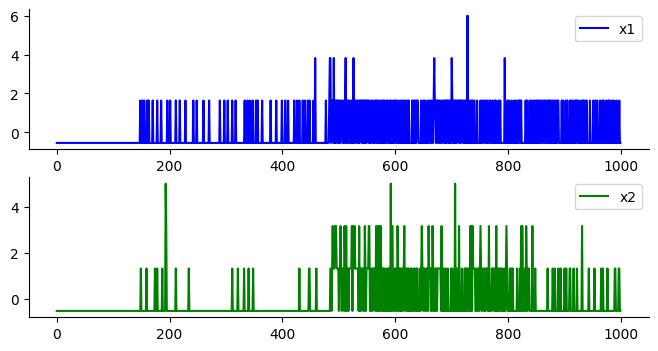

In [57]:
x1=z_binraster_VISp[0]
x2=z_binraster_VISp[3]
X = pd.DataFrame(np.hstack((x1.reshape(-1,1), x2.reshape(-1,1))), columns=['x1','x2'])
X.insert(loc=0, column='Time', value=range(len(X)))

print('Pearson: {:.2f}'.format(stats.pearsonr(X['x1'], X['x2'])[0]))
print('Spearman: {:.2f}'.format(stats.spearmanr(X['x1'], X['x2'])[0]))
print('Kendall: {:.2f}'.format(stats.kendalltau(X['x1'], X['x2'])[0]))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,4))
axes[0].plot(X['x1'], color='b', label='x1')
axes[1].plot(X['x2'], color='g', label='x2')
axes[0].legend(); axes[1].legend()
sns.despine()

Parameters::Validate(): Set knn = 7 (E+1) for Simplex. 
cppEDM Version 1.13.1 2022-07-01
CrossMap(): Simplex cross mapping from x1 to x2  E=6  knn=7  Library: [ 10 20 30 40 50 60 70 80 90 100 ] 

CrossMap(): Simplex cross mapping from x2 to x1  E=6  knn=7  Library: [ 10 20 30 40 50 60 70 80 90 100 ] 



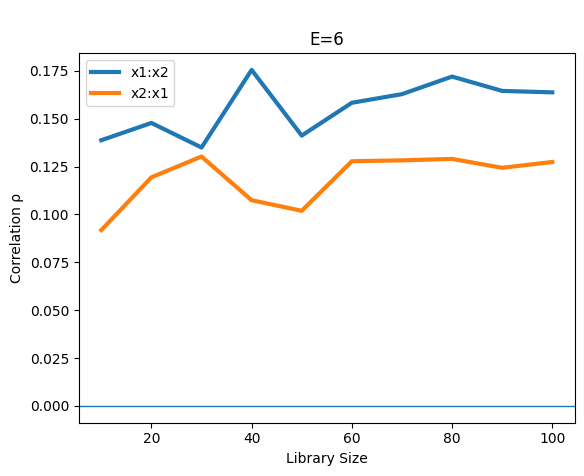

In [58]:
results = pyEDM.CCM(dataFrame = X, \
        E = 6, columns = 'x1', target = 'x2', \
        libSizes = "10 100 10", random=True, sample = 50, verbose = True,  showPlot = True) 

Pearson: -0.09
Spearman: -0.08
Kendall: -0.08


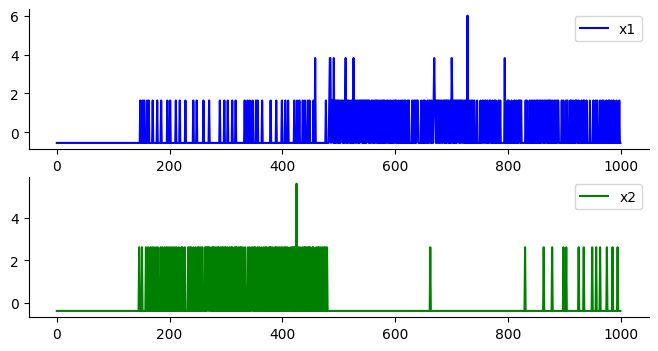

In [17]:
x1=z_binraster_VISp[0]
x2=z_binraster_VISp[5]
X = pd.DataFrame(np.hstack((x1.reshape(-1,1), x2.reshape(-1,1))), columns=['x1','x2'])
X.insert(loc=0, column='Time', value=range(len(X)))

print('Pearson: {:.2f}'.format(stats.pearsonr(X['x1'], X['x2'])[0]))
print('Spearman: {:.2f}'.format(stats.spearmanr(X['x1'], X['x2'])[0]))
print('Kendall: {:.2f}'.format(stats.kendalltau(X['x1'], X['x2'])[0]))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,4))
axes[0].plot(X['x1'], color='b', label='x1')
axes[1].plot(X['x2'], color='g', label='x2')
axes[0].legend(); axes[1].legend()
sns.despine()

Parameters::Validate(): Set knn = 7 (E+1) for Simplex. 
cppEDM Version 1.13.1 2022-07-01
CrossMap(): Simplex cross mapping from x1 to x2  E=6  knn=7  Library: [ 10 20 30 40 50 60 70 80 90 100 ] 

CrossMap(): Simplex cross mapping from x2 to x1  E=6  knn=7  Library: [ 10 20 30 40 50 60 70 80 90 100 ] 



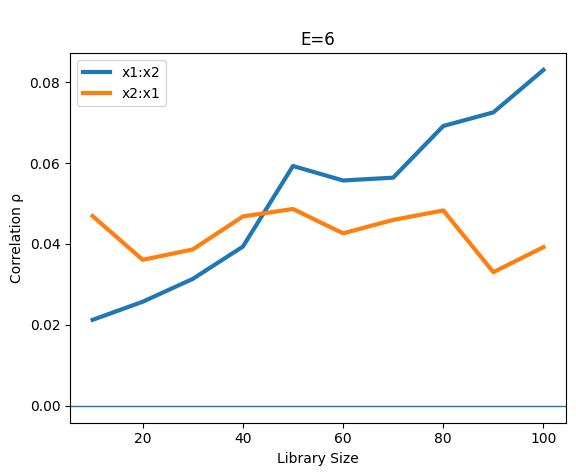

In [55]:
results = pyEDM.CCM(dataFrame = X, \
        E = 6, columns = 'x1', target = 'x2', \
        libSizes = "10 100 10", random=True, sample = 50, verbose = True,  showPlot = True) 

RuntimeError: MakeBlock: The number of columns in the dataFrame (2) is not equal to the number of columns specified (1).
